Seaborn is a Python data visualization library based on matplotlib.

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns

In [146]:
url = 'https://drive.google.com/uc?export=download&id=11sg65mzoOB15VFEly6dqe3SLZv14AgSA'
df_life = pd.read_csv(url)
df_life.head(2)

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662


In [2]:
# Draw beautiful graphics to avoid blurred images
%config InlineBackend.figure_format = 'retina'

# Linechart

In [4]:
italy = df_life[df_life.country=='Italy']
italy.head(2)

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234.0,29.69,54.259,5.47,2225.0,6.091718
6398,Italy,1810,Europe,19491674.0,29.69,54.395,5.47,2371.0,6.491444


<Axes: xlabel='year', ylabel='gdp_per_capita'>

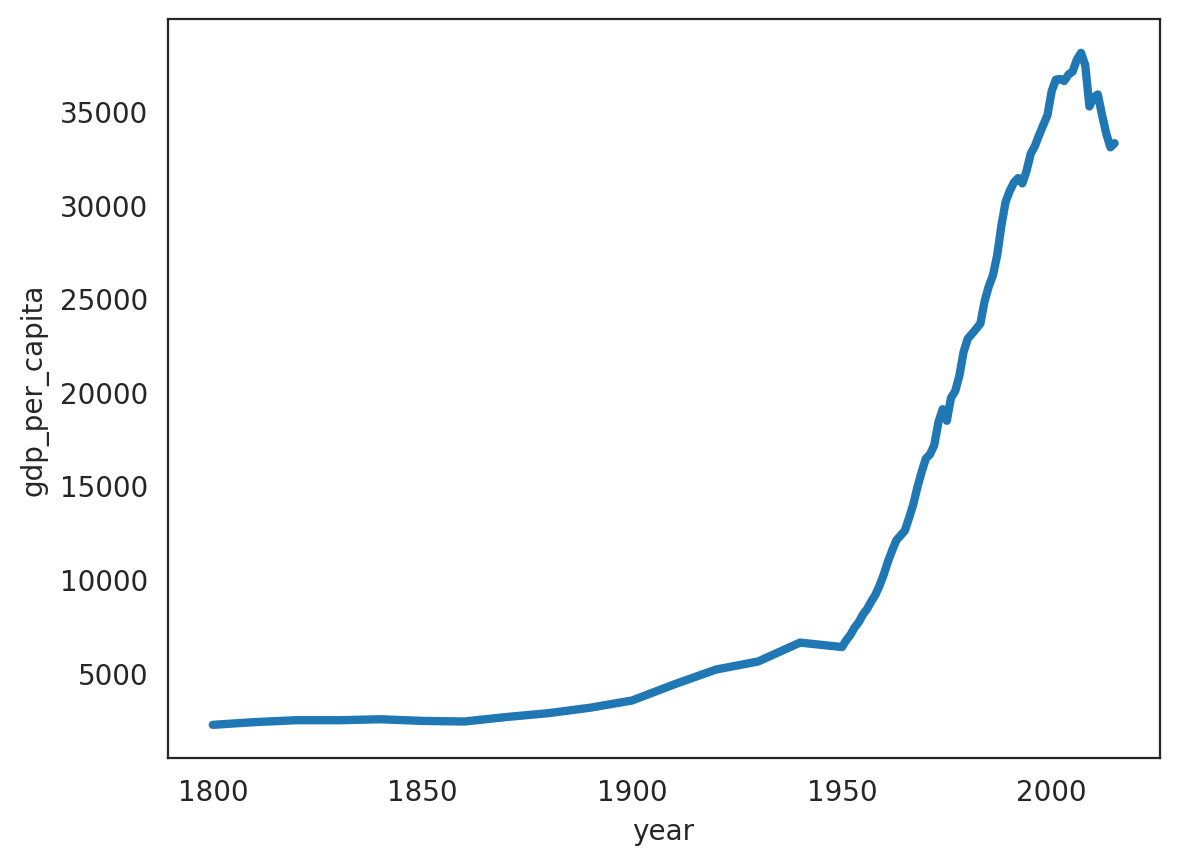

In [20]:
sns.lineplot(x=italy.year, y=italy.gdp_per_capita, linewidth=3)

## Style and context
- Name of a seaborn **palette** (deep, muted, bright, pastel, dark, colorblind)
- **set_theme()** - uses the matplotlib rcParam system and will affect how all matplotlib plots look
- **context**: affects the size of the labels, lines, and other elements but not the overall style
- available contexts: *paper, notebook, talk, poster*. 
- You can call set_context() with one of these names to set the parameters, and you can override the parameters by providing a dictionary of parameter values.
- **style** parameters control properties like the color of the background and whether a grid is enabled
- styles: *darkgrid, whitegrid, dark, white, ticks*
- If you want to customize the seaborn styles, you can pass a dictionary of parameters to the rc argument of axes_style() and set_style(). Note that you can only override the parameters that are part of the style definition through this method.

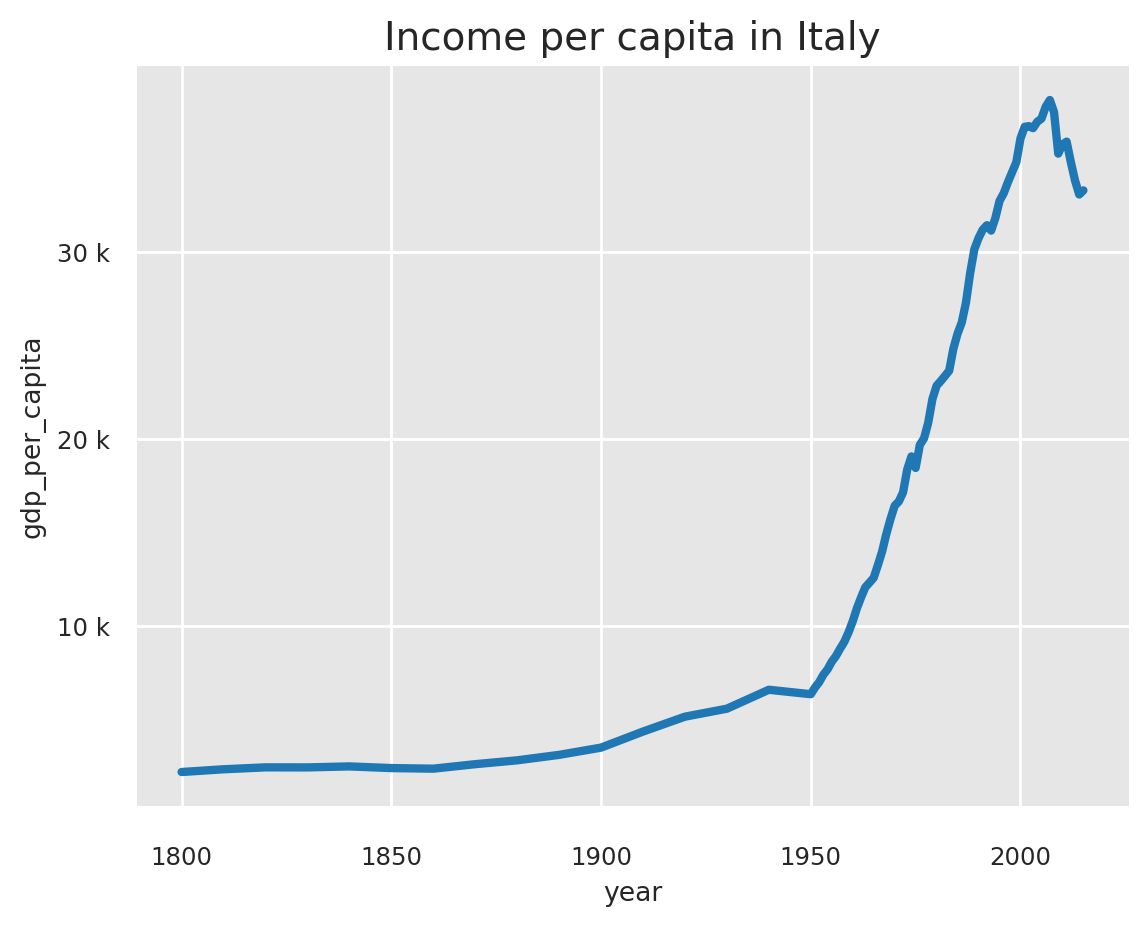

In [38]:
sns.lineplot(x=italy.year, y=italy.gdp_per_capita, linewidth=3)
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("notebook", font_scale=.8, rc={"lines.linewidth": 1.5})
sns.despine(left=True, offset=5, trim=True)

# title but get rid of other labels since the are selfexplainig
plt.title('Income per capita in Italy', fontsize=14)

# fix the y labels
y = [10000,20000,30000]
labels=['10 k', '20 k', '30 k']
plt.yticks(y, labels)

plt.show()

# Relplot
- relations plot can switch betwen kind = 'scatter' and 'line' and has a few parameters to encode <br>
features namely:* size, hue, style*.
- source/df is given to the function with data=df and than the features can be called by name
- set_theme can change many aspects of the appearance, context, style, etc can be called seperatly
- height and aspect (the ratio of the width to the height) are used to change the figure size
https://www.fatalerrors.org/a/master-a-third-of-seaborn-use-relplot-for-statistical-mapping.html

## Line + Confidence Interval 
- solid line is the mean of the combined life expectancy since we did not seperated by country
- the gray area is the 95% confidence interval, 95% of the observations are in this area

In [147]:
le_after_2000 = df_life[df_life.year>=2000][['year', 'life_expectancy']]

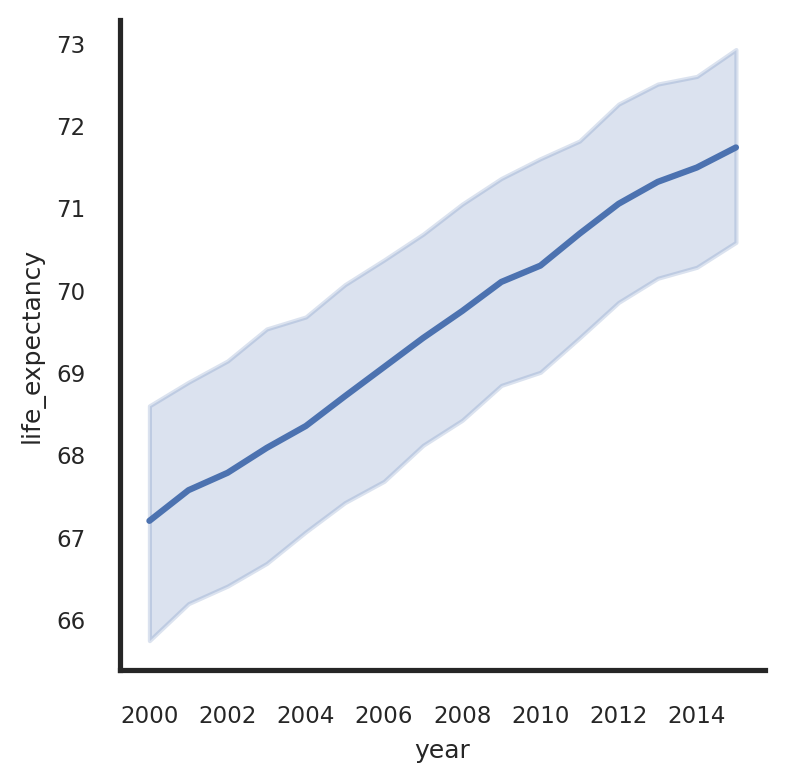

In [46]:
sns.set_theme(context='talk', style='white', font='sans-serif', font_scale=0.5)

g1 = sns.relplot(
    data=le_after_2000,
    kind='line',
    x='year',
    y='life_expectancy',
    # ci='sd', # standard deviation can be choosen instead of ci
    height=4,
    aspect=1)

## Subgraphs
- relplot is a graph-level function, it generates a FacetGrid a Multi-plot grid for plotting conditional relationships.
- add the parameter, **col**, to indicate that you want to create subgraphs in columns
- variables passed to col should be **discrete** in order to work
- **col_wrap**: tells seaborn how many columns we want in a row.
- **col_order**: specify the order of the categories in the column

In [61]:
url_who = 'https://drive.google.com/uc?export=download&id=1d3Wb8DnQwjXXxeLGoUd-RewSuBD9qMAZ'
# df_who = pd.read_csv(url_who)
print(list(df_who.columns))

['Country', 'CountryID', 'Continent', 'Adolescent fertility rate (%)', 'Adult literacy rate (%)', 'Gross national income per capita (PPP international $)', 'Net primary school enrolment ratio female (%)', 'Net primary school enrolment ratio male (%)', 'Population (in thousands) total', 'Population annual growth rate (%)', 'Population in urban areas (%)', 'Population living below the poverty line (% living on &lt; US$1 per day)', 'Population median age (years)', 'Population proportion over 60 (%)', 'Population proportion under 15 (%)', 'Registration coverage of births (%)', 'Total fertility rate (per woman)', 'Antenatal care coverage - at least four visits (%)', 'Antiretroviral therapy coverage among HIV-infected pregt women for PMTCT (%)', 'Antiretroviral therapy coverage among people with advanced HIV infections (%)', 'Births attended by skilled health personnel (%)', 'Births by caesarean section (%)', 'Children aged 6-59 months who received vitamin A supplementation (%)', 'Children a

In [66]:
df_education = df_who[[
    'Country',
    'Continent',
    'Personal_computers_per_100_people',
    'Internet_users',
    'Patent_applications', 
    'Patents_granted',
    'Income_per_person', 
    'Income_share_held_by_lowest_20pct',
    'High_technology_exports',
    'Military_expenditure',
    'Math_achievement_4th_grade', 
    'Math_achievement_8th_grade',
    'Life_expectancy_at_birth', 
    'Literacy_rate_adult_female', 
    'Literacy_rate_adult_male', 
    'Literacy_rate_adult_total', 
    'Literacy_rate_youth_female', 
    'Literacy_rate_youth_male', 
    'Literacy_rate_youth_total',
    'Expenditure_per_student_primary', 
    'Expenditure_per_student_secondary', 
    'Expenditure_per_student_tertiary',
    ]]

# dict for mapping
Continents = {
    1: "Eastern Mediterranean",
    2: "Europe",
    3: "Africa",
    4: "Americas",
    5: "South America",
    6: "South-East Asia",
    7: "South & Eastern Asia"
}

# inserts the new column at position 2 in the df
df_education.insert(2, 'Continent_name', df_education.Continent.map(Continents))

df_education.head(2)

,Country,Continent,Continent_name,Personal_computers_per_100_people,Internet_users,Patent_applications,Patents_granted,Income_per_person,Income_share_held_by_lowest_20pct,High_technology_exports,...,Life_expectancy_at_birth,Literacy_rate_adult_female,Literacy_rate_adult_male,Literacy_rate_adult_total,Literacy_rate_youth_female,Literacy_rate_youth_male,Literacy_rate_youth_total,Expenditure_per_student_primary,Expenditure_per_student_secondary,Expenditure_per_student_tertiary
0,Afghanistan,1,Eastern Mediterranean,NaN,1.0,NaN,NaN,874.0,NaN,NaN,...,43.40,12.59,43.14,28.00,18.39,50.81,34.26,NaN,NaN,NaN
1,Albania,2,Europe,1.2,6.0,89821.0,502.0,5369.0,8.23,4.97,...,76.23,98.25,99.19,98.71,99.50,99.37,99.44,7.78,11.97,36.6


In [68]:
df_education.Continent_name.unique()

array(['Eastern Mediterranean', 'Europe', 'Africa', 'Americas',
       'South America', 'South-East Asia', 'South & Eastern Asia'],
      dtype=object)

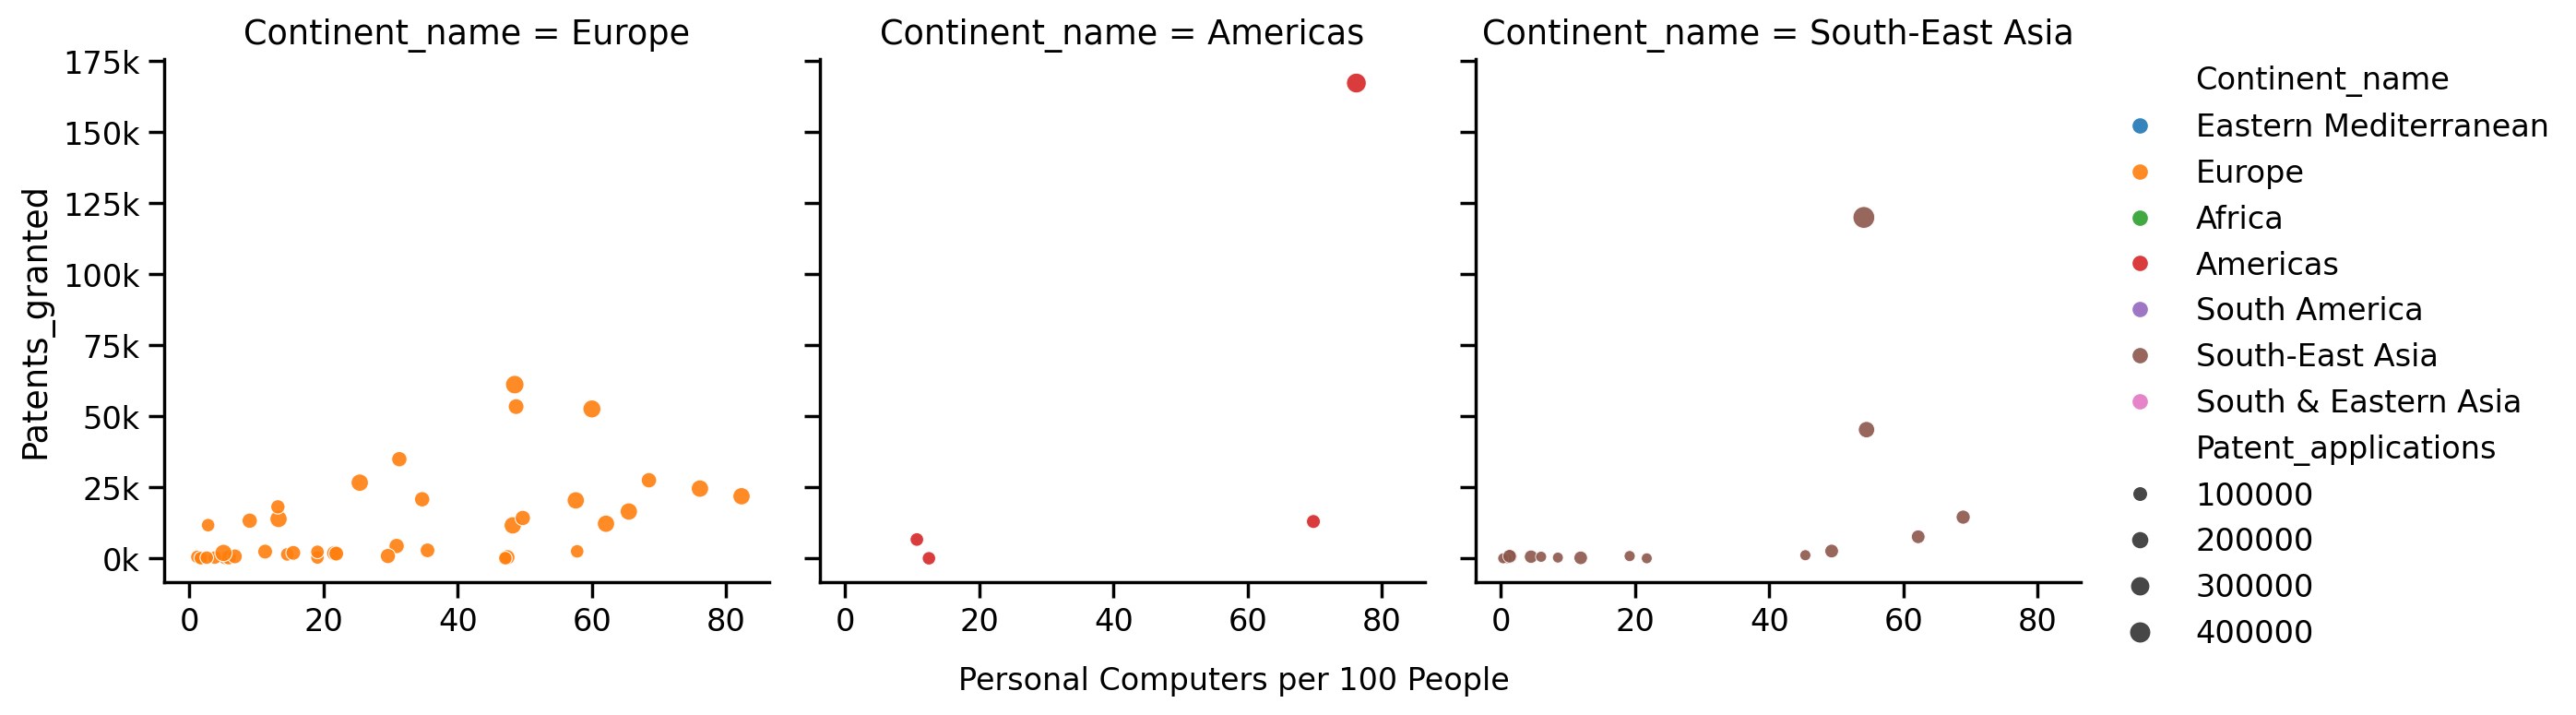

In [141]:

from matplotlib.ticker import FuncFormatter

plt.rcdefaults() # back to defaults
sns.set_context("notebook", font_scale=1.1) 

def thousands_formatter(x, pos):
    return f'{int(x / 1000)}k'

chart = sns.relplot(
        data=df_education,
        kind='scatter',
        x="Personal_computers_per_100_people",
        y="Patents_granted",
        # style='Continent_name',
        hue='Continent_name',
        size='Patent_applications',
        alpha=0.9,
        col='Continent_name', # subplots for continents
        col_order=['Europe', 'Americas', 'South-East Asia'], 
        col_wrap=3, # 3 cols per row
        height=4,
        aspect=1,
        )

# Apply the formatter to each subplot's y-axis
for ax in chart.axes.flat:
        ax.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))
        ax.set_xlabel('') # Remove x-axis label for each individual subplot

# Add a single x-axis label for the entire figure
chart.figure.text(0.5, 0.04, 'Personal Computers per 100 People', ha='center', fontsize=12) 

# plt.tight_layout()
plt.show()

In [163]:
df_life[:2]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000.0,28.21,53.142,7.0,603.0,1.650924
1,Afghanistan,1810,Asia,3280000.0,28.11,53.002,7.0,604.0,1.653662


In [171]:
x = df_life[df_life.year == 1965]['babies_per_woman']
y = df_life[df_life.year == 1965]['age5_surviving']
gdp_pc = df_life[df_life.year == 1965]['gdp_per_capita']
age = df_life[df_life.year == 1965]['life_expectancy']

# Palette
https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette

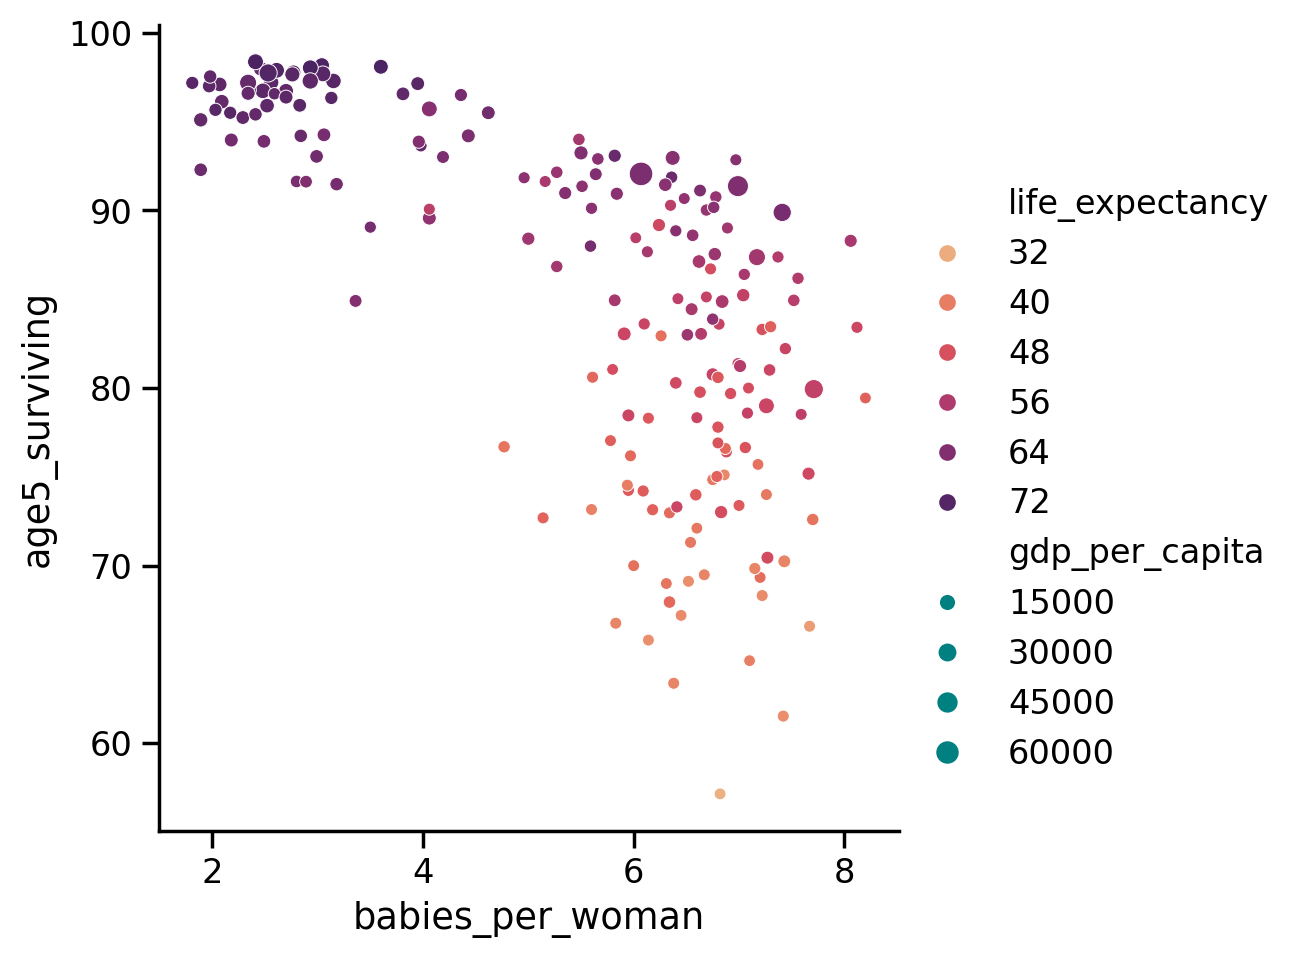

In [185]:
plt.rcdefaults() # back to defaults
sns.set_context("notebook", font_scale=1.1) 
pal = sns.color_palette("flare", as_cmap=True)
sns.relplot(
    x=x, 
    y=y, 
    color='teal', 
    kind='scatter', 
    hue=age, 
    size=gdp_pc, 
    aspect=1,
    palette=pal);

https://www.fatalerrors.org/a/master-a-third-of-seaborn-use-relplot-for-statistical-mapping.html